# Autoencoders

**Autoencoders** are a particular type of neural network, just like classifiers. Autoencoders are similar to classifiers in the sense that they compress data. However, where classifiers condense all the data of an image into a single label, autoencoders compress the data into a **latent vector**, often denoted $z$ in literature, with the goal of preserving the opportunity to recreate the exact same image in the future. Because autoencoders learn representations instead of labels, autoencoders belong to representation learning, a subfield of machine learning, but not necessarily deep learning.

While recreating the same data from a compressed version might seem like an impossible task. However, _you_ can actually do the same. You probably have no difficulty memorizing the following sequence:

$$1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27...$$

I bet you haven't looked at every item, but you can still write down the sequence perfectly because you recognized a pattern: all uneven numbers, starting from 1.

This is what autoencoders do: they find patterns in data.

## Architecture
Autoencoders consist of two networks:

* Encoder
* Decoder

The goal of the **encoder** is to compress an image, video, or any piece of data that can be represented as a tensor, into a _latent vector_. The **decoder** does, as you might have guessed, the exact opposite.

To maximize performance, minimize the loss that is, encoders and decoders are typically symmetrical together. Naturally, the input size is equal to the output size of an autoencoder.

Autoencoders always have less input neurons in the middle layer than in the input and output layer. This is called the **bottleneck**. If it weren't for this bottleneck, the autoencoders could just copy this data over from the input to the output layer without compressing it.

![](https://upload.wikimedia.org/wikipedia/commons/2/28/Autoencoder_structure.png) [source](https://en.wikipedia.org/wiki/File:Autoencoder_structure.png)

## Training

Encoders and decoders _can_ be trained separately, but usually they are trained in one go. In order to do so, one stacks the coders together in one **stacked autoencoder**.

If one desires to train autoencoders separately, one starts by using the first hidden layer, discaring every other layer, except for the input and output layers of course. He uses the original training data at this point. Next, he uses the latent vector $z$ learnt by this mini-autoencoder and trains another autoencoder in the same way, treating the latent vectors as original data. Once the desired depth is reached, one can stack all output layers, which provided the latent vectors, together in a sinle encoder. This approach is not used in practise a lot, but literature might refer to it as greedy layerwise training so it's good to know what it means.

## Appliciations

While the phase "finding patterns" might not seem very interesting, there are a lot of exciting applications of autoencoders. We will look at three of those today:

1. Dense autoencoder: compressing data.
2. Convolutional autoencoder: a building block of DCGANs, self-supervised learning.
3. **Denoising autoencoder: removing noise from poor training data.**

While all of these applications use pattern finding, they have different use cases making autoencoders one of the most exciting topics of machine learning.

> we will use denoising capacity of autoencoder on mnist fashion dataset

In [11]:
##importing the keras from tensorflow packages
from tensorflow import keras
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## MNIST fasthion Datasets

>This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

In [12]:
(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255


## A simple autoencoder

Let's start by looking at the simplest possible autoencoder.

The `encoder` is a sequential neural network with $28 \times 28$ input neurons, $100$ neurons in the second layer and $30$ in the third. The third layer is called the "bottleneck". Feel free to play around with this variable to see how it affects results.

## Denoising autoencoder

Images are prone to noises.It becomes difficult for computer to understand the noised images.


In [15]:
import numpy as np

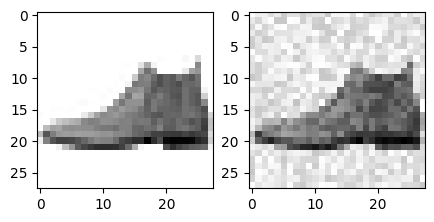

In [17]:
# You probably have no difficulty classifying the images below as shoes. 

figsize(5, 10)
subplot(1, 2, 1)
imshow(x_test[0], cmap="binary")

subplot(1, 2, 2)
noise = np.random.random((28, 28)) / 4
imshow(x_test[0] + noise, cmap="binary")

But in machine learning, this noise can be catasrophic. Luckily machine learning also has a solution for this problem: auto encoders!

**By applying noise to the images inputted to the encoder and setting the clean image as desired output, $y$, an autoencoder can learn to remove noise from the image.**

Let's look at such an encoder:

In [18]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(30, activation="relu")
])

In [19]:
decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [20]:
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [21]:
stacked_autoencoder.compile(loss="binary_crossentropy",
                            optimizer='adam')

**Now create a dataset filled with noise:**

In [22]:
x_train_noise = x_train + ((np.random.random(x_train.shape)) / 4)
x_test_noise = x_test + ((np.random.random(x_test.shape)) / 4)

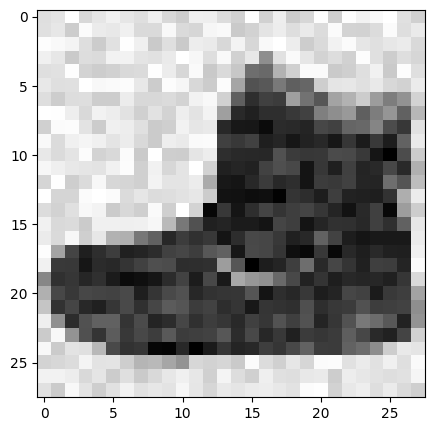

In [24]:
## plotting noisy images create by adding random noise to train dataset
imshow(x_train_noise[0], cmap="binary")

And finally train the stacked autoencoder with noise input data and clean output data.

In [25]:
history = stacked_autoencoder.fit(x_train_noise, x_train, epochs=10,
                                  validation_data=[x_test_noise, x_test])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3238 - val_loss: 0.3032
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2961 - val_loss: 0.2948
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2897 - val_loss: 0.2895
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2861 - val_loss: 0.2873
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2837 - val_loss: 0.2852
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2820 - val_loss: 0.2833
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2808 - val_loss: 0.2823
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2799 - val_loss: 0.2819
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2791 - val_loss: 0.2816
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.278

1/1 [==============================] - 0s 15ms/step


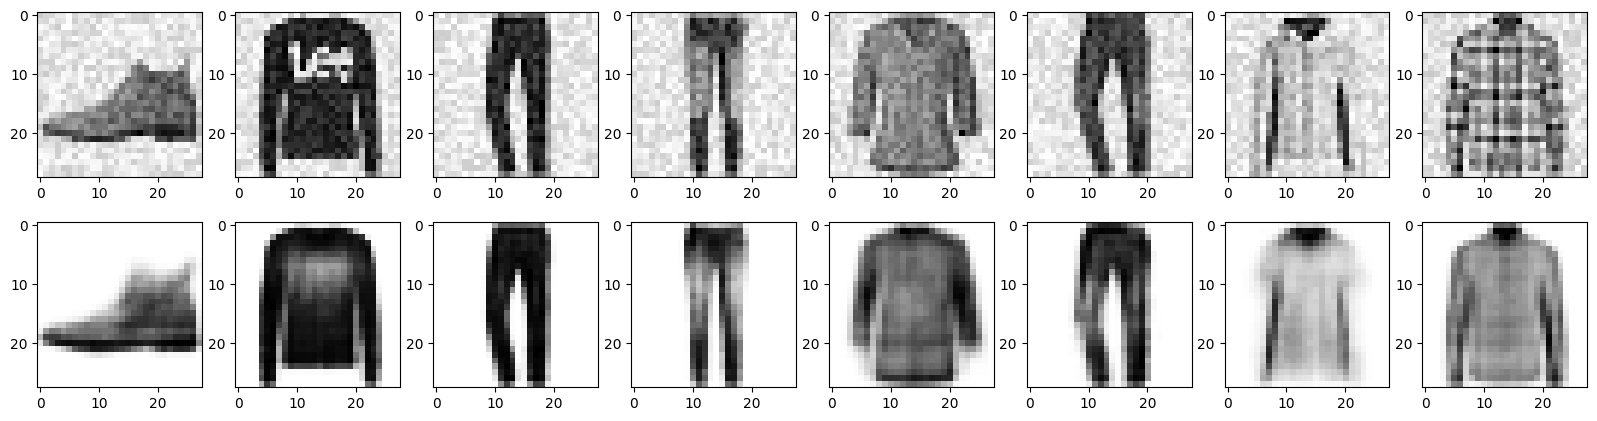

In [26]:
figsize(20, 5)
for i in range(8):
  subplot(2, 8, i+1)
  imshow(x_test_noise[i], cmap="binary")

  subplot(2, 8, i+8+1)
  pred = stacked_autoencoder.predict(x_test_noise[i].reshape((1, 28, 28)))
  imshow(pred.reshape((28, 28)), cmap="binary")

In the above plot we can see how a simple autoencoder can remove noise from noisy images. The first row represents the noisy image and second row is the denoised image by using simple autoencoder model.